# Laboratorio 2 - Detección de Spam

## Universidad del Valle de Guatemala

## Security Data Science

#### Integrantes:
* Oscar Morales
* Andrés de la Roca

In [242]:
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
import contractions
import textsearch

### Parte 1 - Ingeniería de Características

#### Exploración de Datos y Pre-Procesamiento

In [243]:
# Carga de datos
df = pd.read_csv('spam.csv', encoding='latin-1')

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [244]:
# Unir las columnas v2, Unnamed: 2, Unnamed: 3 y Unnamed: 4
df['v2'] = df['v2'] + ' ' + df['Unnamed: 2'].fillna('') + ' ' + df['Unnamed: 3'].fillna('') + ' ' + df['Unnamed: 4'].fillna('')

# Drop Unnamed: 2, Unnamed: 3 and Unnamed: 4
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [245]:
# Hacer minúsculas los mensajes de v2
df['v2'] = df['v2'].str.lower()

df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [246]:
# Remover acentos
def remove_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

df['v2'] = df['v2'].apply(remove_accents)

df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will i_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [247]:
# Remover caracteres especiales, numeros y simbolos
def remove_special_chars(text):
    return re.sub(r'[^a-z\s]', '', text)

df['v2'] = df['v2'].apply(remove_special_chars)

df

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will i b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


In [248]:
# Corregir texto
def expand_contractions(text):
    return contractions.fix(text)

df['v2'] = df['v2'].apply(expand_contractions)

df

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif you oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,you dun say so early hor you c already then sa...
4,ham,nah i do not think he goes to usf he lives aro...
...,...,...
5567,spam,this is the nd time we have tried contact you...
5568,ham,will i b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


In [249]:
# Renombrar columnas
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [250]:
nltk.download('punkt')
df['message'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [251]:
df

,label,message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, you, oni]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[you, dun, say, so, early, hor, you, c, alread..."
4,ham,"[nah, i, do, not, think, he, goes, to, usf, he..."
...,...,...
5567,spam,"[this, is, the, nd, time, we, have, tried, con..."
5568,ham,"[will, i, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [252]:
# Stop words
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [word for word in text if word not in stopword_list]

df['message'] = df['message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [253]:
df

,label,message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[dun, say, early, hor, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[nd, time, tried, contact, pound, prize, claim..."
5568,ham,"[b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitching, acted, like, id, interested, b..."


In [254]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(text):
    return [ps.stem(word) for word in text]

df['message'] = df['message'].apply(stemming)

In [255]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatization(text):
    return [wnl.lemmatize(word) for word in text]

df['message'] = df['message'].apply(lemmatization)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [256]:
df

,label,message
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, oni]"
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,"[dun, say, earli, hor, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"
...,...,...
5567,spam,"[nd, time, tri, contact, pound, prize, claim, ..."
5568,ham,"[b, go, esplanad, fr, home]"
5569,ham,"[piti, mood, soani, suggest]"
5570,ham,"[guy, bitch, act, like, id, interest, buy, som..."


In [257]:
# Remover palabras de longitud menor a 3
def remove_short_words(text):
    return [word for word in text if len(word) > 2]

df['message'] = df['message'].apply(remove_short_words)

#### Representación de texto

In [258]:
# Normalizar texto
def normalize_text(text):
    return ' '.join(text)

df['message'] = df['message'].apply(normalize_text)

In [259]:
df

,label,message
0,ham,jurong point crazi avail bugi great world buff...
1,ham,lar joke wif oni
2,spam,free entri wkli comp win cup final tkt may tex...
3,ham,dun say earli hor alreadi say
4,ham,nah think goe usf live around though
...,...,...
5567,spam,time tri contact pound prize claim easi call p...
5568,ham,esplanad home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like interest buy someth next we...


Spam = 1
Ham = 0

In [260]:
# Reemplazar spam por 1 y ham por 0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [261]:
df

,label,message
0,0,jurong point crazi avail bugi great world buff...
1,0,lar joke wif oni
2,1,free entri wkli comp win cup final tkt may tex...
3,0,dun say earli hor alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,time tri contact pound prize claim easi call p...
5568,0,esplanad home
5569,0,piti mood soani suggest
5570,0,guy bitch act like interest buy someth next we...


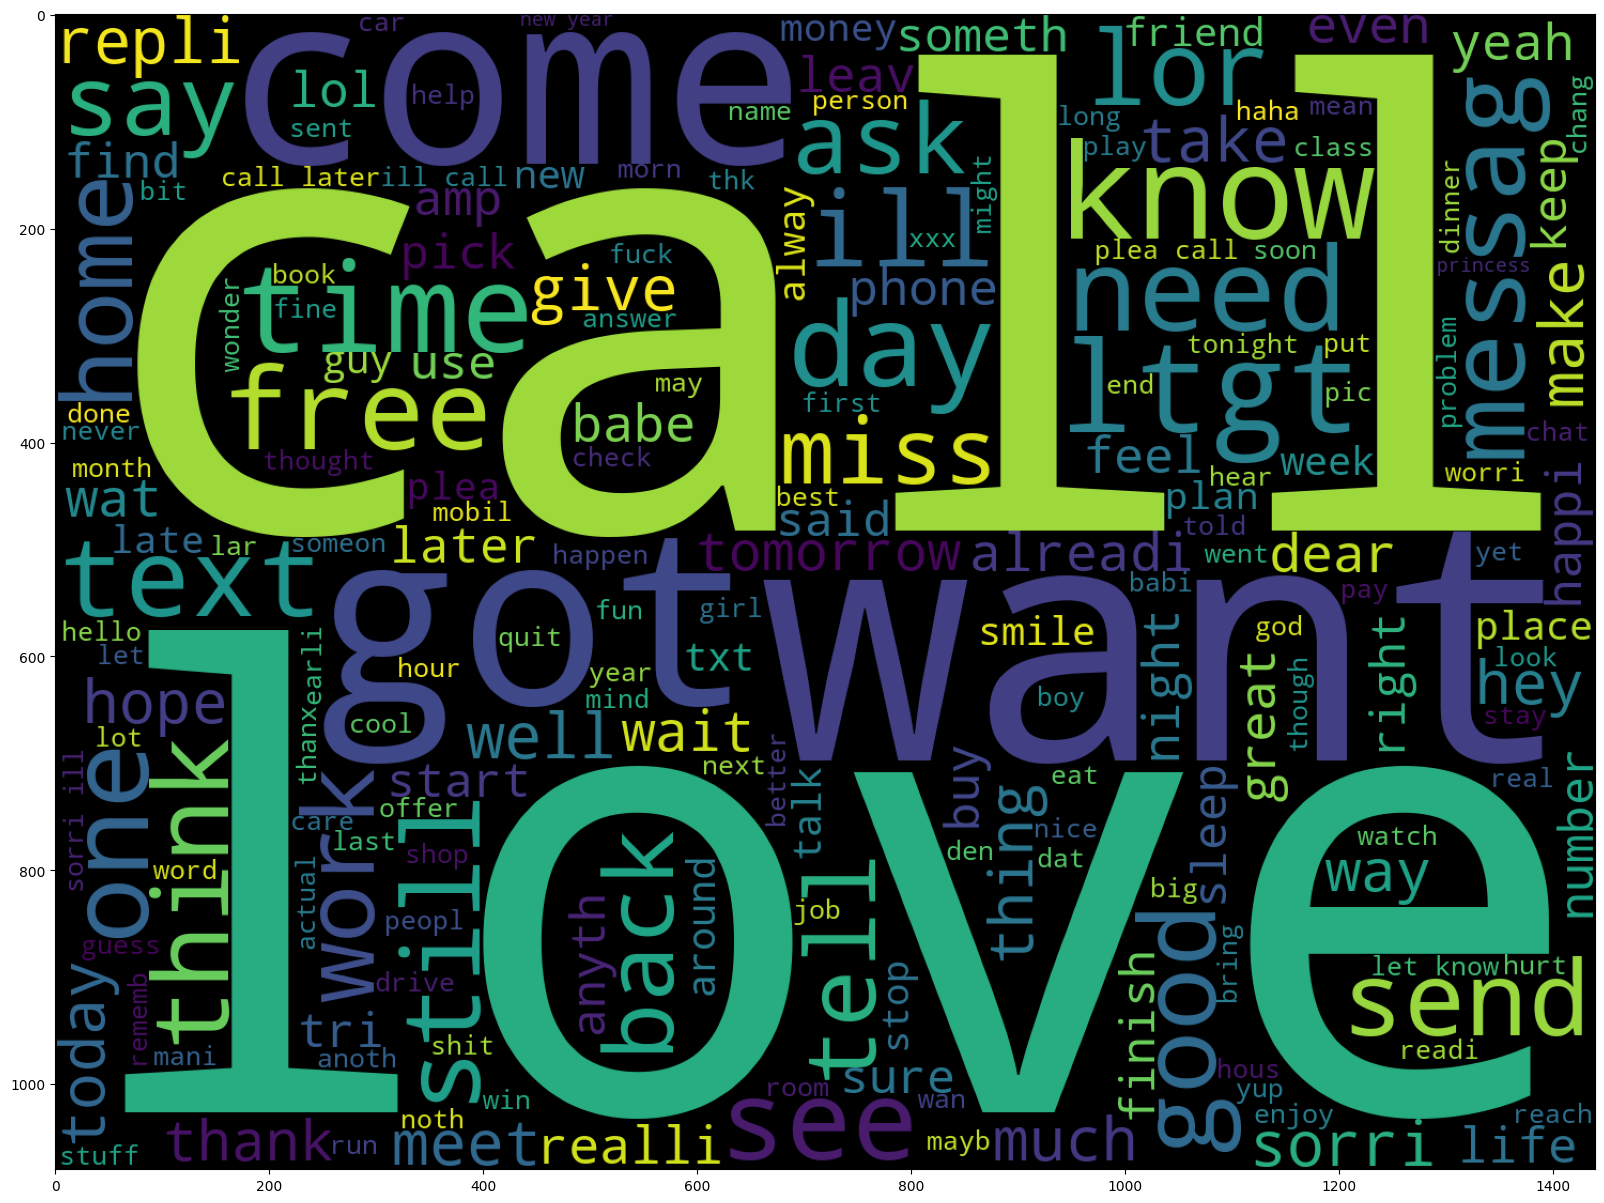

In [262]:
import matplotlib
import pylab as plt
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(df['message']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)


Modelo BoG

In [263]:
from sklearn.feature_extraction.text import CountVectorizer

bv = CountVectorizer(ngram_range=(1, 2))
bv_matrix = bv.fit_transform(df['message'])

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
BoG_df = pd.DataFrame(bv_matrix, columns=vocab)
BoG_df

,aah,aah bless,aah cuddl,aah speak,aaniy,aaniy pudunga,aaooooright,aaooooright work,aathilov,aathilov lot,...,zoe hit,zoe join,zogtoriu,zogtoriu iaov,zoom,zoom cine,zouk,zouk nichol,zyada,zyada kisi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
# Mostrar las palabras más frecuentes
word_freq = BoG_df.sum(axis=0)
word_freq = word_freq.sort_values(ascending=False)
word_freq

call              657
get               451
know              305
come              300
love              286
                 ... 
home tomorrow       1
home thanksgiv      1
home super          1
home stuff          1
zyada kisi          1
Length: 33623, dtype: int64

TF-IDF

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df['message'])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
tfIDF_df = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
tfIDF_df

,aah,aaniy,aaooooright,aathilov,aathiwher,aaward,abbey,abdomen,abeg,abel,...,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
# Mostrar las palabras más frecuentes
word_freq = tfIDF_df.sum(axis=0)
word_freq = word_freq.sort_values(ascending=False)

word_freq

call            133.28
get              94.23
come             84.07
ill              75.44
know             71.07
                 ...  
shivratri         0.10
companion         0.10
psychologist      0.10
athlet            0.10
psychiatrist      0.10
Length: 6869, dtype: float64

### Parte 2 - Implementación del modelo

### Discusión

¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un
SMS legítimo (falso positivo)? Justifique su respuesta.

Compare los valores para cada modelo de representación numérico. En base a la respuesta de
la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado,
BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor
manera?

En base a la exploración de datos e ingeniería de características que realizó en el primer y este
laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email
o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar
para ayudarlo a detectar un potencial phishing?

Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su
distribución?